In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston_dataset=load_boston()

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [10]:
boston['MEDV'] = boston_dataset.target

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
X=boston.loc[:,"CRIM":"LSTAT"].values
Y=boston.MEDV

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
model=LinearRegression()

In [57]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_predict=model.predict(x_test)

In [59]:
sns.set() ##圖變高級

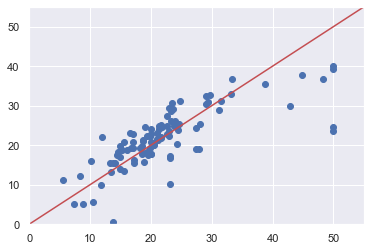

In [60]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],"r") 
#點剛好在線上表示預測房價和真正房價是相同的
#若是點高於表示預測>實際 表高估
#若是點低於線表示預測<實際 表低估

## 猜測波士頓人可能選擇房屋的主要因素有以下
* CRIM-犯罪率
* INDUS- 非商業用地所佔比率
* NOX-一氧化碳濃度(空汙)
* RM-每間房子的平均房間數
* DIS-與就業中心的距離
* RAD- 高速公路的可到達程度
* TAX-政府抽的不動產稅率

## 於是特別挑出這幾個因素做預測

In [61]:
X=boston[["CRIM","INDUS","NOX","RM","DIS","RAD","TAX"]]
Y=boston.MEDV

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [63]:
model=LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_predict=model.predict(x_test)

In [66]:
sns.set()

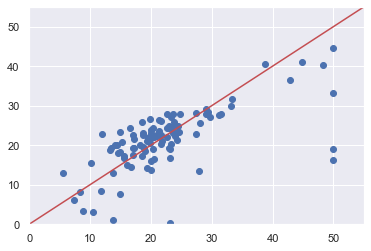

In [67]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],"r") 
#點剛好在線上表示預測房價和真正房價是相同的
#若是點高於表示預測>實際 表高估
#若是點低於線表示預測<實際 表低估